# ¡Hola Alejandro! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Alejandro! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

In [110]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# Importar datasets
df_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [112]:
# Estudiar los datos que contienen
print('===============Dataset 01===============')
display(df_01.head())
df_01.info()
print('')

print('===============Dataset 04===============')
display(df_04.head())
df_04.info()

===============Dataset 01===============


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

===============Dataset 04===============


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>


Muy bien hecho con la revisión inicial de la data, ahora tenemos los tipos correctos y sabemos con claridad lo que contiene 



</div>

In [113]:
# Asegurarse de que los tipos de datos sean correctos

# Limpiar espacios en strings
df_01['company_name'] = df_01['company_name'].astype(str).str.strip()
df_04['dropoff_location_name'] = df_04['dropoff_location_name'].astype(str).str.strip()

# Covertir a columnas numéricas
df_01['trips_amount'] = pd.to_numeric(df_01['trips_amount'], errors='coerce')
df_04['average_trips'] = pd.to_numeric(df_04['average_trips'], errors='coerce')

# Revisar nulos tras la conversión
print('Nulos en Dataset 01:')
print(df_01.isna().sum(),'\n')
print('Nulos en Dataset 02:')
print(df_04.isna().sum())

Nulos en Dataset 01:
company_name    0
trips_amount    0
dtype: int64 

Nulos en Dataset 02:
dropoff_location_name    0
average_trips            0
dtype: int64


In [114]:
# Top 10 primncipales barrios por finalización ('average_trips')
top10_dropoff = df_04.sort_values('average_trips', ascending=False).head(10)
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [115]:
# Descriptivos
print('===============Dataset 01===============')
print(df_01['trips_amount'].describe(),'\n')
print('===============Dataset 04===============')
print(df_04['average_trips'].describe())

===============Dataset 01===============
count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64 

===============Dataset 04===============
count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64


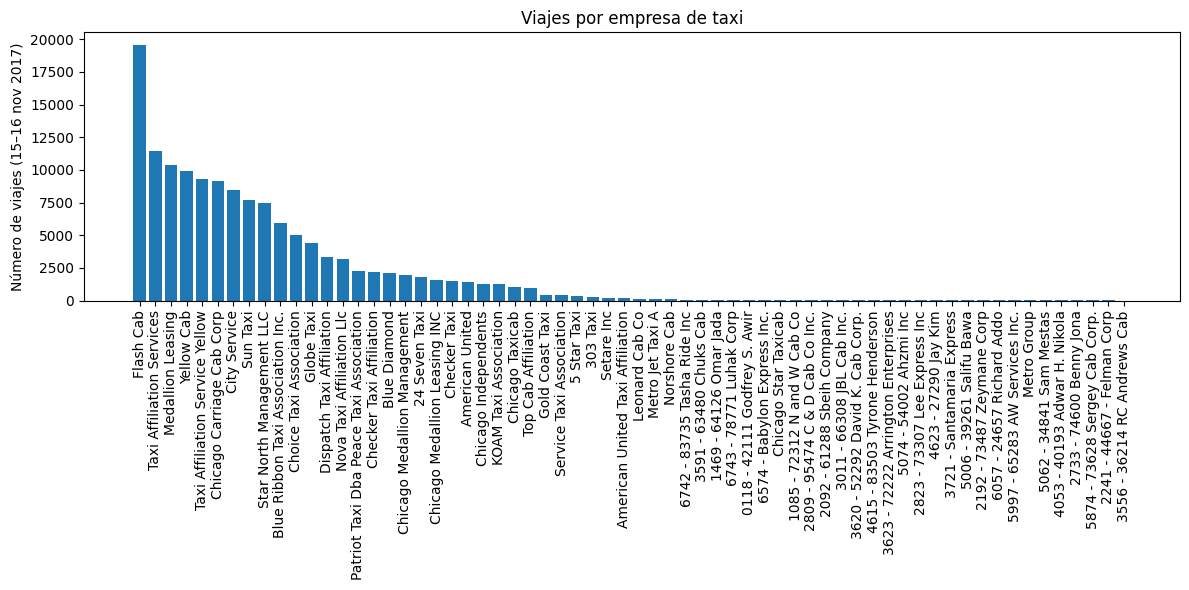

In [116]:
# Gráfica: Empresas de taxi vs número de viaje

df_01_sorted = df_01.sort_values('trips_amount', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_01_sorted['company_name'], df_01_sorted['trips_amount'])
plt.xticks(rotation=90)
plt.ylabel('Número de viajes (15–16 nov 2017)')
plt.title('Viajes por empresa de taxi')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Muy buen trabajo con la gráfica! Observamos que Flash Cab tiene el liderazgo de cantidad de viajes, bastante más arriba que el competidor que le sigue. Esta concentración de mercado se puede dar por varios factores como cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Nota que hacia los valores más pequeños, los nombres de las empresas parecen nombres de personas. Probablemente se debe a que son viajes realizados por el mismo chofer particular.



</div>

El mercado está dominado por unas pocas compañías. Flash Cab lidera con 19,558 viajes y, junto con las siguientes 4 empresas, concentra alrededor del 44% de todos los viajes del 15–16 de noviembre de 2017. La gran diferencia entre la media y la mediana sugiere una “cola larga”: muchas compañías realizan pocos viajes, mientras que unas pocas concentran la mayor parte de la demanda. Para Zuber, esto implica que la competencia fuerte se concentra en los principales operadores, pero también existe fragmentación donde podrían encontrarse oportunidades de entrada.

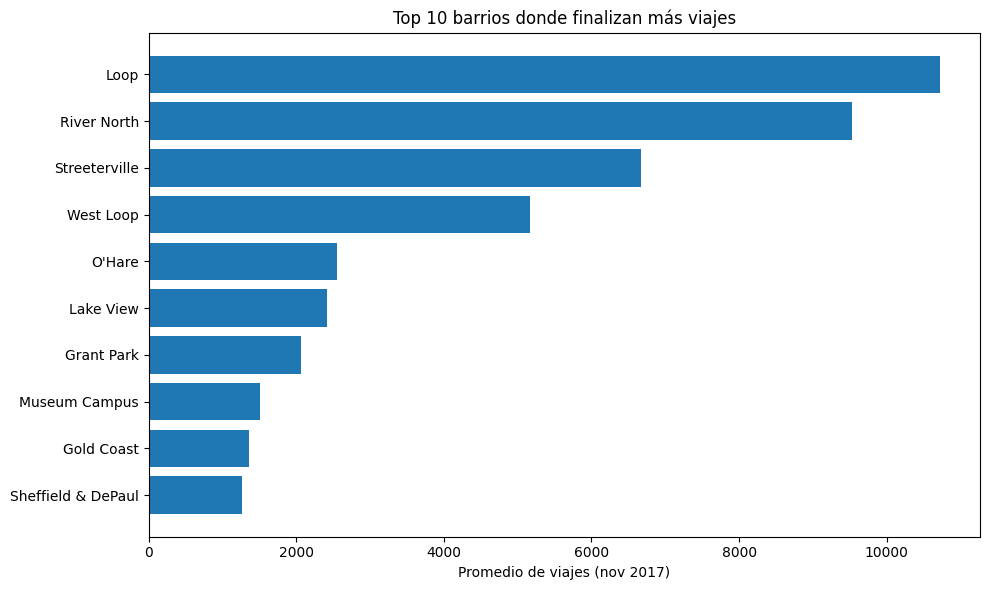

In [117]:
# Gráfica: Top 10 barrios por número de finalizaciones

top10_dropoff_sorted = top10_dropoff.sort_values('average_trips')  # para que en horizontal quede “de menor a mayor”

plt.figure(figsize=(10, 6))
plt.barh(top10_dropoff_sorted['dropoff_location_name'], top10_dropoff_sorted['average_trips'])
plt.xlabel('Promedio de viajes (nov 2017)')
plt.title('Top 10 barrios donde finalizan más viajes')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Buen trabajo obteniendo el top de barrios! El gráfico está ordenado de mayor a menor, lo que permite notar correctamente que Loop Y River North son los principales destinos. Tal vez tienen atractivos importantes que los hacen lugares de muchas visitas.

</div>

Los dropoffs están altamente concentrados en zonas de alta actividad (Loop, River North, Streeterville y West Loop), lo que sugiere que estas áreas representan los principales “destinos” durante noviembre de 2017. Además, O’Hare aparece en el Top 10, indicando que los viajes hacia el aeropuerto tienen un peso importante. La diferencia marcada entre la mediana y la media confirma una distribución con cola larga: la mayoría de barrios registra pocos viajes, mientras que unos cuantos concentran una parte sustancial de los finalizados. Para Zuber, estos barrios son puntos clave para priorizar cobertura, disponibilidad de conductores y estrategias de precios/promociones.

# **Prueba de Hipotesis**

In [118]:
import datetime
from datetime import timedelta
import random
from scipy import stats

In [119]:
df_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

# Estudiar los datos que contienen
print('===============Dataset 07===============')
display(df_07.head())
df_07.info()

===============Dataset 07===============


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [120]:
# Asegurar tipos correctos
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'], errors='coerce')
df_07['duration_seconds'] = pd.to_numeric(df_07['duration_seconds'], errors='coerce')

# Revisar nulos tras la conversión
print('Nulos en Dataset 07:')
df_07.isna().sum()

Nulos en Dataset 07:


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [121]:
# Quitar duraciones 0 si existen
df_07 = df_07[df_07['duration_seconds'] > 0]

In [122]:
# Verificar sábados
# En pandas: Monday=0 ... Saturday=5 ... Sunday=6
is_saturday = (df_07['start_ts'].dt.dayofweek == 5)
print('Proporción de sábados en el dataset:', is_saturday.mean())

Proporción de sábados en el dataset: 1.0


100% de los registros son sábados.

In [123]:
# Verificar que los grupos existen
df_07['weather_conditions'].value_counts()

Good    882
Bad     180
Name: weather_conditions, dtype: int64

In [124]:
# Separar grupos
bad = df_07.loc[df_07['weather_conditions'] == 'Bad', 'duration_seconds']
good = df_07.loc[df_07['weather_conditions'] == 'Good', 'duration_seconds']

bad.shape[0], good.shape[0]

(180, 882)

In [125]:
# Descriptivos
print('Bad')
print(bad.describe(),'\n')
print('Good')
print(good.describe())

Bad
count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64 

Good
count     882.000000
mean     2013.278912
std       743.565217
min        60.000000
25%      1397.250000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64


## Planteamiento de Hipótesis
### Hipótesis nula (H₀)
La duración promedio de los viajes **Loop → O'Hare** es la misma en sábados con clima **Bad** y **Good**:

$$\mu_{Bad} = \mu_{Good}$$

### Hipótesis alternativa (H₁)
La duración promedio de los viajes **Loop → O'Hare** **cambia** en sábados lluviosos (clima **Bad** vs **Good**):

$$\mu_{Bad} \neq \mu_{Good}$$

> Nota: Es una prueba **bilateral (two-sided)** porque “cambia” puede significar que aumenta o disminuye.

In [126]:
# Nivel de significación (α)
alpha = 0.05

In [127]:
# Prueba: t-test de dos muestras con Welch (varianzas no iguales)
stats.ttest_ind(bad, good, equal_var=False)

Ttest_indResult(statistic=6.979328835930791, pvalue=2.4173590471585584e-11)

In [128]:
# Ejecutar la prueba + decisión
t_stat, p_value = stats.ttest_ind(bad, good, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print(f"Rechazamos H0 (p < {alpha}). Hay evidencia de que la duración promedio cambia en sábados lluviosos.")
else:
    print(f"No rechazamos H0 (p >= {alpha}). No hay evidencia suficiente para afirmar que cambie la duración promedio.")


t-statistic: 6.979328835930791
p-value: 2.4173590471585584e-11
Rechazamos H0 (p < 0.05). Hay evidencia de que la duración promedio cambia en sábados lluviosos.


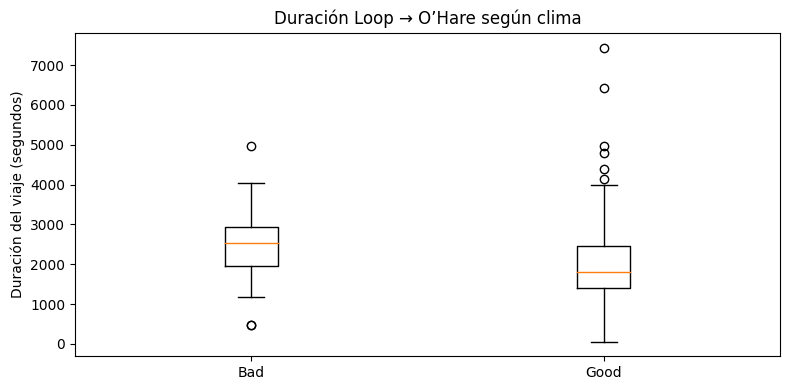

In [129]:
# Gráfico

plt.figure(figsize=(8, 4))
plt.boxplot([bad, good], labels=['Bad', 'Good'])
plt.ylabel('Duración del viaje (segundos)')
plt.title('Duración Loop → O’Hare según clima')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el test de hipótesis, fue realizado de forma correcta. Además, haces muy bien en mostrar las distribuciones.

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales. Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es estadísticamente diferente. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).





</div>

### Conclusión (Prueba de hipótesis)

Se evaluó si la **duración promedio** de los viajes desde **Loop** hasta el **Aeropuerto Internacional O’Hare** cambia los sábados con mal clima.

- Se estableció un nivel de significación de **$\alpha = 0.05$**.
- Se plantearon las hipótesis:
  - **$H_0$:** $\mu_{Bad} = \mu_{Good}$ (la duración promedio es igual con clima *Bad* y *Good*).
  - **$H_1$:** $\mu_{Bad} \neq \mu_{Good}$ (la duración promedio cambia con el clima).
- Se aplicó una **prueba t para dos muestras independientes con corrección de Welch** (`equal_var=False`), adecuada porque los grupos tienen tamaños distintos y no se asume varianza igual.

Después de limpiar valores no realistas (duraciones no positivas), se obtuvieron:
- **Bad (n = 180):** media $\approx 2427$ s  
- **Good (n = 882):** media $\approx 2013$ s  

La diferencia de medias es de aproximadamente **414 segundos** (≈ **6.9 minutos**), siendo **mayor** cuando el clima es *Bad*.

El resultado de la prueba arrojó un **p-value mucho menor que $\alpha$**, por lo que **se rechaza $H_0$**.

**Conclusión final:** existe evidencia estadística de que la duración promedio de los viajes **Loop → O’Hare** **sí cambia** los sábados con mal clima (*Bad*), y en promedio estos viajes tienden a ser **más largos** que en condiciones *Good*.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Excelente, bien hecho con las conclusiones, logras señalar todos los puntos más relevantes del análisis. Haces muy bien al referirte los valores específicos de las métricas.



</div>